In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib "inline"
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [2]:
data = pd.read_csv(r'C:\Users\nEW u\Desktop\EXINUS.csv')

In [3]:
print(data.head())

         DATE  EXINUS
0  1973-01-01  8.0041
1  1973-02-01  7.7538
2  1973-03-01  7.5465
3  1973-04-01  7.5462
4  1973-05-01  7.4927


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv(r'C:\Users\nEW u\Desktop\EXINUS.csv', parse_dates=['DATE'], index_col='DATE',date_parser=dateparse)



In [5]:
dumme = data['1989':'1992']
dumme['EXINUS'] = data['1989':'1992'].mean()
dumme['EXINUS'] = 21.141044
data['1989':'1992'] = dumme

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
print(data.dtypes)

EXINUS    float64
dtype: object


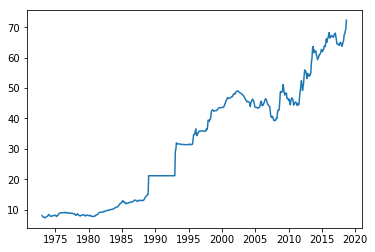

In [7]:
plt.plot(data)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
   #Dickey Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [9]:
print(data.dtypes)

EXINUS    float64
dtype: object


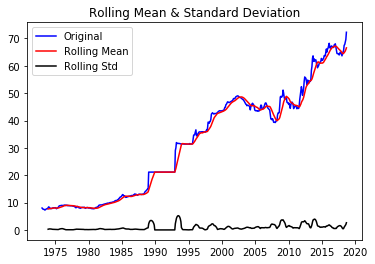

Results of Dickey-Fuller Test:
Test Statistic                   0.750171
p-value                          0.990788
#Lags Used                       1.000000
Number of Observations Used    547.000000
Critical Value (1%)             -3.442361
Critical Value (5%)             -2.866838
Critical Value (10%)            -2.569592
dtype: float64


In [10]:
test_stationarity(data)

In [11]:
data_log = np.log(data)

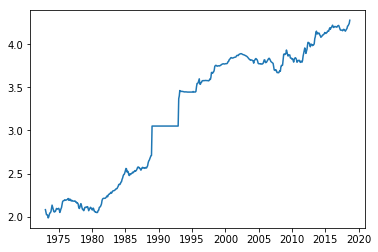

In [12]:
plt.plot(data_log)

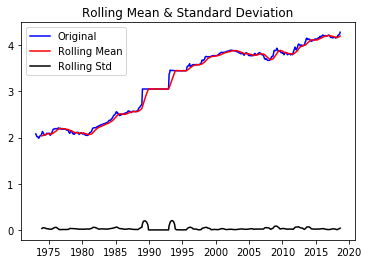

Results of Dickey-Fuller Test:
Test Statistic                  -0.684363
p-value                          0.850758
#Lags Used                       1.000000
Number of Observations Used    547.000000
Critical Value (1%)             -3.442361
Critical Value (5%)             -2.866838
Critical Value (10%)            -2.569592
dtype: float64


In [13]:
test_stationarity(data_log)

In [14]:
data_log_sqrt = np.sqrt(data_log)

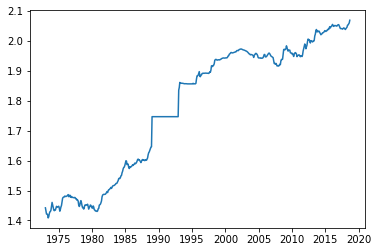

In [15]:
plt.plot(data_log_sqrt)

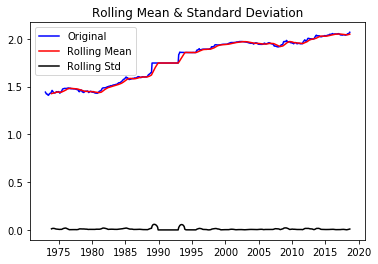

Results of Dickey-Fuller Test:
Test Statistic                  -0.917140
p-value                          0.782276
#Lags Used                       1.000000
Number of Observations Used    547.000000
Critical Value (1%)             -3.442361
Critical Value (5%)             -2.866838
Critical Value (10%)            -2.569592
dtype: float64


In [16]:
test_stationarity(data_log_sqrt)

In [17]:
moving_avg = data_log.rolling(12).mean()

In [18]:
d = data_log - moving_avg

In [19]:

d.head(12)

,EXINUS
DATE,
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,NaN
1973-04-01,NaN
1973-05-01,NaN
1973-06-01,NaN
1973-07-01,NaN
1973-08-01,NaN
1973-09-01,NaN


In [20]:
d.dropna(inplace=True)

In [21]:
d.head(12)

,EXINUS
DATE,
1973-12-01,0.057763
1974-01-01,0.092979
1974-02-01,0.064691
1974-03-01,0.036209
1974-04-01,0.008738
1974-05-01,-0.004680
1974-06-01,-0.002921
1974-07-01,-0.010078
1974-08-01,0.004336


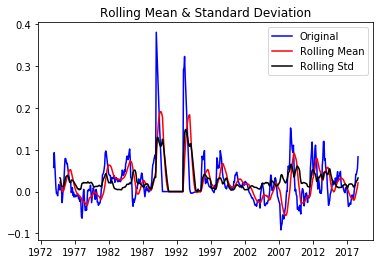

Results of Dickey-Fuller Test:
Test Statistic                -6.419348e+00
p-value                        1.807726e-08
#Lags Used                     2.000000e+00
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64


In [22]:
 test_stationarity(d)

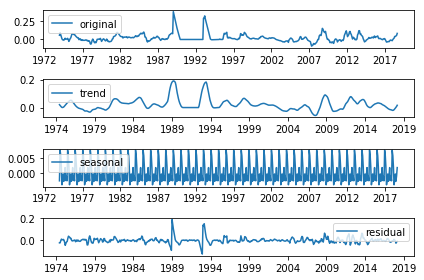

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(d)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(d, label = 'original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend , label= 'trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'residual')
plt.legend(loc = 'best')

plt.tight_layout()

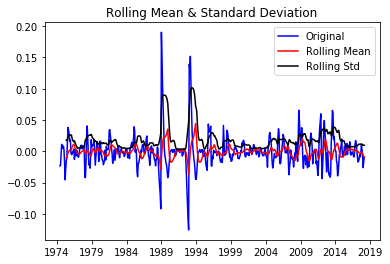

Results of Dickey-Fuller Test:
Test Statistic                -1.090528e+01
p-value                        1.132272e-19
#Lags Used                     9.000000e+00
Number of Observations Used    5.160000e+02
Critical Value (1%)           -3.443087e+00
Critical Value (5%)           -2.867158e+00
Critical Value (10%)          -2.569762e+00
dtype: float64


In [24]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

In [25]:
data_log_shifting = data_log - data_log.shift()
data_log_shifting.dropna(inplace = True)

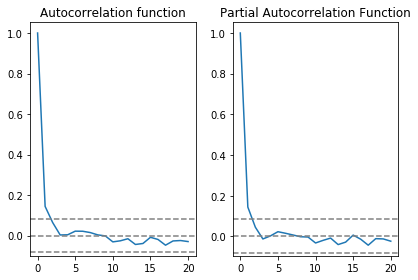

In [26]:
#Now find p and q
#using ACF and PACF
from statsmodels.tsa.stattools import acf,pacf
log_acf = acf(data_log_shifting, nlags = 20)
log_pacf = pacf(data_log_shifting, nlags = 20, method = 'ols')

#plot acf
plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0,linestyle = '--',color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shifting)),linestyle = '--',color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(data_log_shifting)),linestyle = '--',color = 'grey')
plt.title('Autocorrelation function')

#plot pacf
plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y=0,linestyle = '--',color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shifting)),linestyle = '--',color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(data_log_shifting)),linestyle = '--',color = 'grey')
plt.title('Autocorrelation function')

plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [27]:
data_log.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


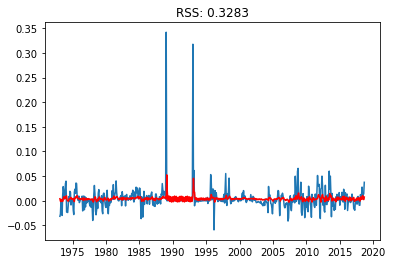

In [32]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(data_log, order= (3,1,3))
results_AR = model.fit(disp = -1)
plt.plot(data_log_shifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-data_log_shifting['EXINUS'])**2))
print('Plotting AR model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will 

Plotting MA model


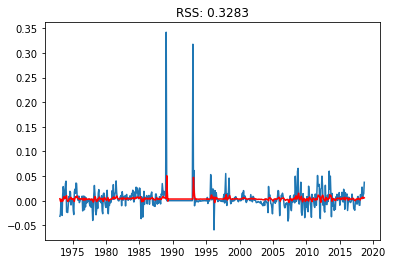

In [34]:
#MA MODEL
model = ARIMA(data_log, order= (3,1,0))
results_MA = model.fit(disp = -1)
plt.plot(data_log_shifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-data_log_shifting['EXINUS'])**2))
print('Plotting MA model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


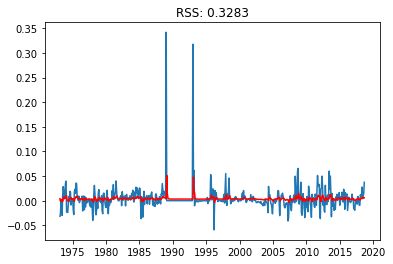

In [35]:
#ARIMA MODEL
model = ARIMA(data_log, order= (1,1,1))
results_ARIMA = model.fit(disp = -1)
plt.plot(data_log_shifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-data_log_shifting['EXINUS'])**2))
print('Plotting ARIMA model')

In [36]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff)

DATE
1973-02-01    0.004012
1973-03-01   -0.001196
1973-04-01   -0.001645
1973-05-01    0.002039
1973-06-01    0.001964
1973-07-01   -0.001244
1973-08-01    0.003658
1973-09-01    0.007365
1973-10-01    0.006773
1973-11-01    0.004629
1973-12-01    0.005527
1974-01-01    0.008673
1974-02-01    0.010153
1974-03-01    0.001735
1974-04-01   -0.000338
1974-05-01   -0.000992
1974-06-01    0.000776
1974-07-01    0.003783
1974-08-01    0.003135
1974-09-01    0.005880
1974-10-01    0.006294
1974-11-01    0.002798
1974-12-01    0.003390
1975-01-01    0.003830
1975-02-01    0.004006
1975-03-01    0.000698
1975-04-01   -0.001320
1975-05-01    0.004526
1975-06-01    0.006840
1975-07-01    0.006243
                ...   
2016-04-01    0.001065
2016-05-01    0.001733
2016-06-01    0.003866
2016-07-01    0.004199
2016-08-01    0.003273
2016-09-01    0.002736
2016-10-01    0.002736
2016-11-01    0.003192
2016-12-01    0.005117
2017-01-01    0.004068
2017-02-01    0.003964
2017-03-01    0.001211
2017-0

In [42]:
#convert to cumulative sum
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
#print(prediction_ARIMA_diff_cumsum)

In [38]:
prediction_ARIMA_log = pd.Series(data_log['EXINUS'].ix[0],index= data_log.index)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [39]:
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head()

DATE
1973-01-01    2.079954
1973-02-01    2.083966
1973-03-01    2.082771
1973-04-01    2.081126
1973-05-01    2.083164
dtype: float64

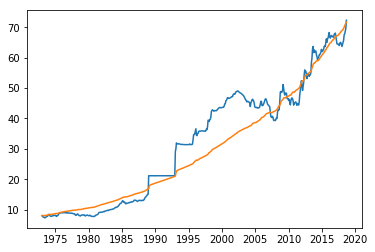

In [40]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(data)
plt.plot(prediction_ARIMA)

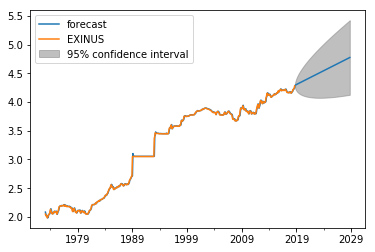

In [45]:
results_ARIMA.plot_predict(1,669)
x = results_ARIMA.forecast(steps =120)